<a href="https://colab.research.google.com/github/aruaru0/SAM-TEST/blob/main/Fast_SAM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# インストール

In [1]:
!pip uninstall --yes tensorflow-probability

Found existing installation: tensorflow-probability 0.22.0
Uninstalling tensorflow-probability-0.22.0:
  Successfully uninstalled tensorflow-probability-0.22.0


In [2]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git
%cd FastSAM
!pip install -r requirements.txt

Cloning into 'FastSAM'...
remote: Enumerating objects: 1221, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 1221 (delta 229), reused 205 (delta 196), pack-reused 932
Receiving objects: 100% (1221/1221), 72.46 MiB | 36.07 MiB/s, done.
Resolving deltas: 100% (486/486), done.
/content/FastSAM
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 697.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-w4bxbdwb
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-w4bxbdwb
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.7 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369500 sha256=23955090220901b7d8b952a923b7e0f14f17b5a59d9003af9d77c4930e64c715
  Stored in directory: /tmp/pip-ephem-wheel-cache-zttzjxku/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.10
    Uninstalling wcwidth-0.2.10:
      Successfully uninstalled wcwidth-0.2.10


In [4]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from fastsam import FastSAM, FastSAMPrompt
import torch
import numpy as np

In [5]:
# https://qiita.com/namakemono/items/c963e75e0af3f7eed732
!curl -sc /tmp/cookie "https://drive.google.com/uc?export=download&id=1m1sjY4ihXBU1fZXdQ-Xdj-mDltW-2Rqv" > /dev/null
!CODE="$(awk '/_warning_/ {print $NF}' /tmp/cookie)"  ; curl -Lb /tmp/cookie "https://drive.google.com/uc?export=download&confirm=${CODE}&id=1m1sjY4ihXBU1fZXdQ-Xdj-mDltW-2Rqv" -o FastSAM-x.pt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  138M  100  138M    0     0  89.4M      0  0:00:01  0:00:01 --:--:--  133M


# 画像の読み込み

In [6]:
!wget -O cat2.png https://github.com/aruaru0/SAM-TEST/blob/main/cat2.png?raw=true

--2023-12-01 07:49:07--  https://github.com/aruaru0/SAM-TEST/blob/main/cat2.png?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/aruaru0/SAM-TEST/raw/main/cat2.png [following]
--2023-12-01 07:49:07--  https://github.com/aruaru0/SAM-TEST/raw/main/cat2.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aruaru0/SAM-TEST/main/cat2.png [following]
--2023-12-01 07:49:07--  https://raw.githubusercontent.com/aruaru0/SAM-TEST/main/cat2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 638240 (623K) [image/png]
Saving

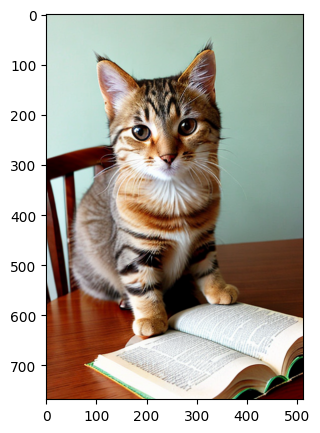

In [7]:
image = cv2.imread('cat2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('on')
plt.show()

# モデルを読み込む

In [8]:
model = FastSAM('./FastSAM-x.pt')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
everything_results = model(image, device=device, retina_masks=True, imgsz=1024, conf=0.4, iou=0.9,)
prompt_process = FastSAMPrompt(image, everything_results, device=device)

cuda



0: 1024x704 20 objects, 141.2ms
Speed: 16.2ms preprocess, 141.2ms inference, 47.4ms postprocess per image at shape (1, 3, 1024, 1024)


# Everything

torch.Size([20, 768, 512])


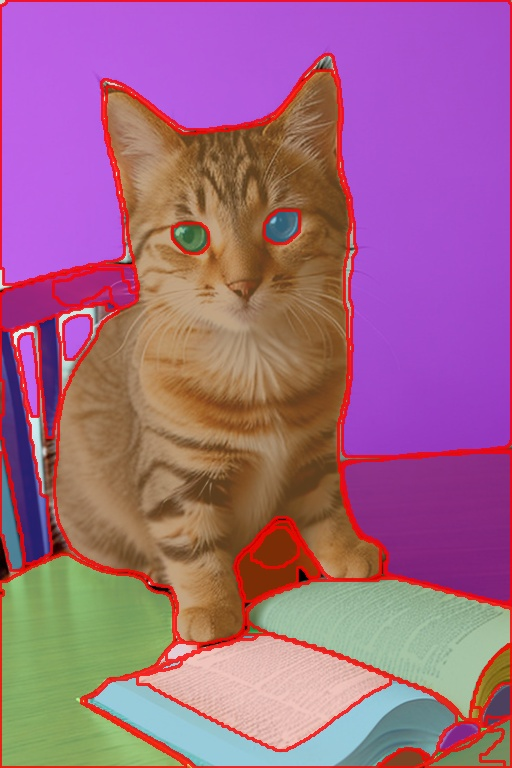

In [9]:
ann = prompt_process.everything_prompt()

print(ann.shape)

prompt_process.plot(annotations=ann,output_path='./result.jpg',)

result = cv2.imread('./result.jpg')
cv2_imshow(result)

# point

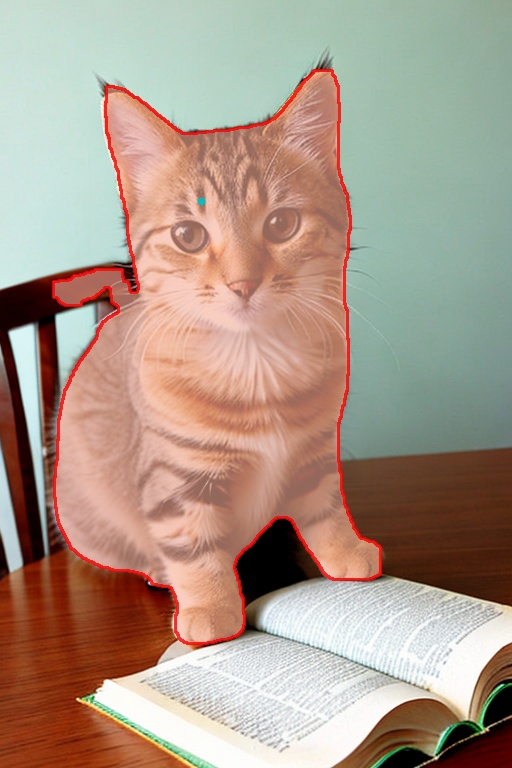

In [10]:
input_point = np.array([[200, 200]])
input_label = np.array([1])

ann = prompt_process.point_prompt(points=input_point,  pointlabel=input_label)

prompt_process.plot(annotations=ann,output_path='./result.jpg',
                    points = input_point,
                    point_label = input_label,)

result = cv2.imread('./result.jpg')
cv2_imshow(result)

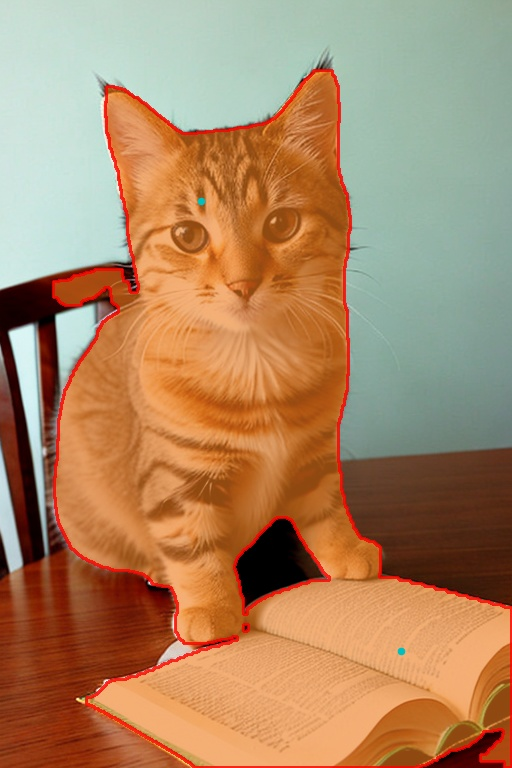

In [11]:
input_point = np.array([[200, 200], [400, 650]])
input_label = np.array([1, 1])

ann = prompt_process.point_prompt(points=input_point,  pointlabel=input_label)

prompt_process.plot(annotations=ann,output_path='./result.jpg',
                    points = input_point,
                    point_label = input_label,)

result = cv2.imread('./result.jpg')
cv2_imshow(result)

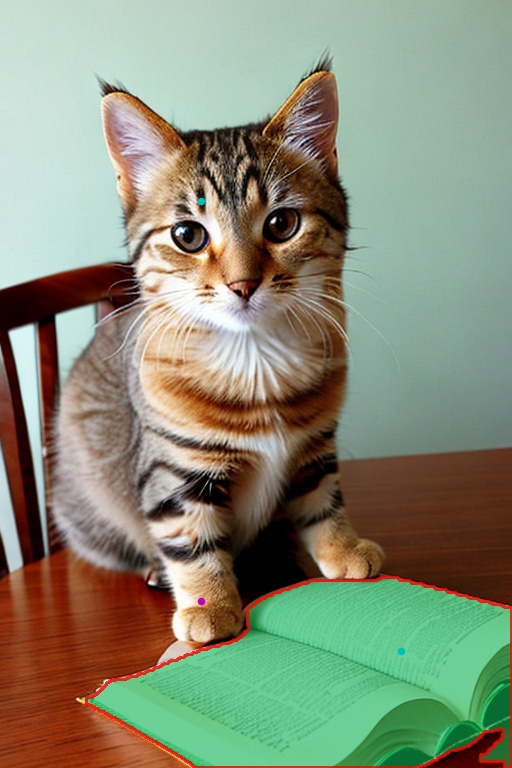

In [12]:
input_point = np.array([[200, 200], [400, 650], [200, 600]])
input_label = np.array([1, 1, 0])


ann = prompt_process.point_prompt(points=input_point,  pointlabel=input_label)

prompt_process.plot(annotations=ann,output_path='./result.jpg',
                                        points = input_point,
                    point_label = input_label,)

result = cv2.imread('./result.jpg')
cv2_imshow(result)

## bounding box

(1, 768, 512)


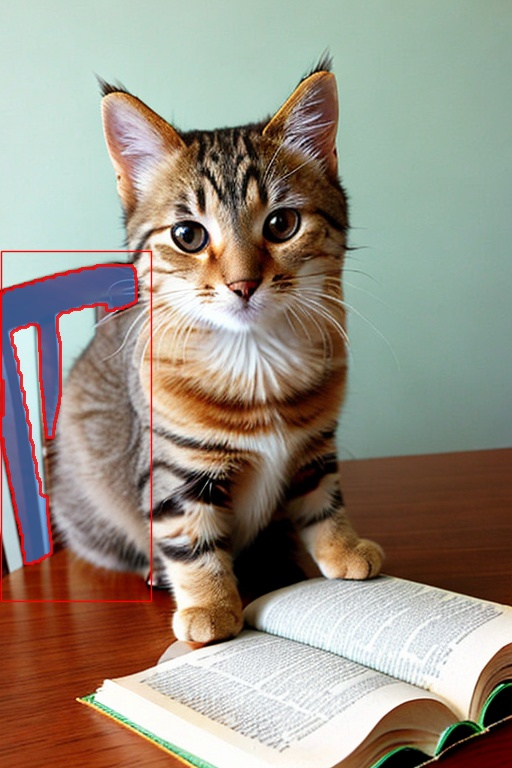

In [13]:
input_boxes = [
    [0, 250, 150, 600],
]

ann = prompt_process.box_prompt(bboxes = input_boxes)

print(ann.shape)

prompt_process.plot(annotations=ann,output_path='./result.jpg',
                    bboxes = input_boxes,)

result = cv2.imread('./result.jpg')
cv2_imshow(result)

(3, 768, 512)


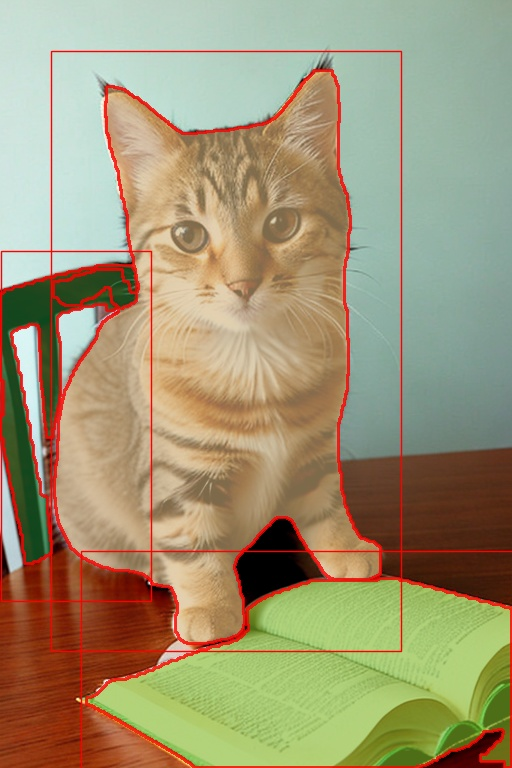

In [14]:
input_boxes = [
    [0, 250, 150, 600],
    [50, 50, 400, 650],
    [80, 550, 512, 768]
]

ann = prompt_process.box_prompt(bboxes = input_boxes)

print(ann.shape)

prompt_process.plot(annotations=ann,output_path='./result.jpg',
                    bboxes = input_boxes,)

result = cv2.imread('./result.jpg')
cv2_imshow(result)

# Text

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 146MiB/s]


(1, 768, 512)


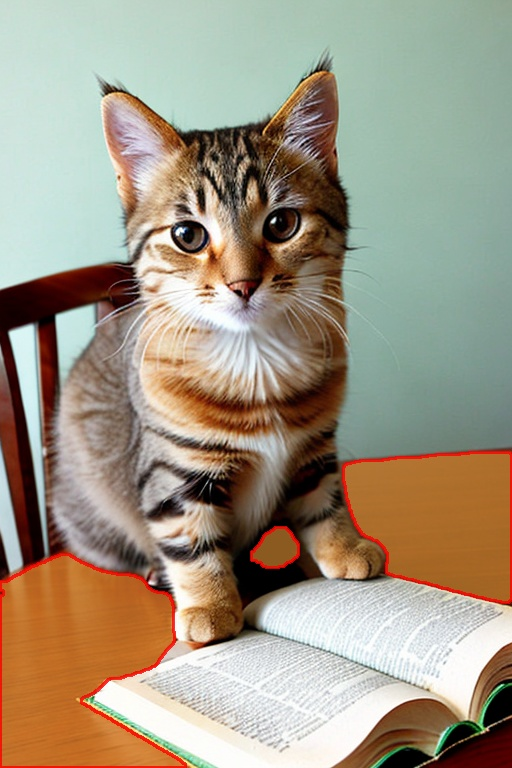

In [15]:
ann = prompt_process.text_prompt(text='cat')

print(ann.shape)

prompt_process.plot(annotations=ann,output_path='./result.jpg',)

result = cv2.imread('./result.jpg')
cv2_imshow(result)